<a href="https://colab.research.google.com/github/AlvinChiew/DeepLearning/blob/main/TF2_0_NLP_LSTM_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# possible applications : sentimental analysis, documentation classification, etc

# Module Import

In [17]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model

# Load Data

In [3]:
!wget https://raw.githubusercontent.com/AlvinChiew/DeepLearning/main/raw_data/TF2.0_NLP_LSTM_spam.csv

--2020-12-20 10:58:01--  https://raw.githubusercontent.com/AlvinChiew/DeepLearning/main/raw_data/TF2.0_NLP_LSTM_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘TF2.0_NLP_LSTM_spam.csv’

TF2.0_NLP_LSTM_spam 100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2020-12-20 10:58:01 (10.7 MB/s) - ‘TF2.0_NLP_LSTM_spam.csv’ saved [503663/503663]



In [4]:
 df = pd.read_csv('TF2.0_NLP_LSTM_spam.csv', encoding='ISO-8859-1')
 df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Pre-Processing

In [5]:
df.drop(columns=df.columns[2:], inplace=True)               # remove uselss columns
df.columns = ['labels', 'data']                             # rename column headers
df['labels_idx'] = df['labels'].map({'ham':0,'spam':1})     # relabel target values to index (binary in this case)
df.head()

,labels,data,labels_idx
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X = df['data']
y = df['labels_idx'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

## Train Set

In [8]:
# convert sentences to vectors

MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)                             # train tokenizing model

X_train_sequence = tokenizer.texts_to_sequences(X_train)     # fit tokenizing model

In [9]:
word_idx = tokenizer.word_index
V = len(word_idx)  
print(f'# tokens of word : {V}')        # V = 7,150, # tokens

# tokens of word : 7150


In [10]:
X_train_padded = pad_sequences(X_train_sequence)
X_train_padded

array([[   0,    0,    0, ...,   58,  188,  117],
       [   0,    0,    0, ..., 2295, 3374,  257],
       [   0,    0,    0, ...,  267,   14, 1273],
       ...,
       [   0,    0,    0, ...,   80,  102,   21],
       [   0,    0,    0, ..., 1376,   56,    3],
       [   0,    0,    0, ...,  279,    2,    3]], dtype=int32)

In [11]:
X_train_padded.shape

(3733, 162)

In [12]:
T = X_train_padded.shape[1]
print(f'length of sequence : {T}')      # T = 162, vector lenght 

length of sequence : 162


## Test set

In [13]:
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequence, maxlen=T)      # truncate sentence if longer than max length in train set
X_test_padded.shape

(1839, 162)

# Train Model

In [14]:
D = 20      # embedded dimensionality / word vector size, trial and error input
M = 15      # hidden state vector size

i = Input(shape=(T,))       # vector length / sentence input length
x = Embedding(V+1, D)(i)    # ( # word tokens + 0 for padding) 

# Applies RNN
x = LSTM(M, return_sequences=True)(x)   # return  hidden state output for each input time step - works well with long term dependencies (trial & error)
x = GlobalMaxPooling1D()(x)             # works well with long term dependencies (trial & error)

# Logistic Regression
x = Dense(1, activation='sigmoid')(x)   

model = Model(i,x)

In [15]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']   
)

result = model.fit(
    X_train_padded, y_train,
    epochs = 10,
    validation_data = (X_test_padded, y_test)
) 

Epoch 1/10
117/117 [==============================] - 10s 67ms/step - loss: 0.5824 - accuracy: 0.8007 - val_loss: 0.3735 - val_accuracy: 0.8581
Epoch 2/10
117/117 [==============================] - 7s 62ms/step - loss: 0.3401 - accuracy: 0.8680 - val_loss: 0.3316 - val_accuracy: 0.8581
Epoch 3/10
117/117 [==============================] - 7s 63ms/step - loss: 0.3075 - accuracy: 0.8653 - val_loss: 0.2983 - val_accuracy: 0.8581
Epoch 4/10
117/117 [==============================] - 7s 62ms/step - loss: 0.2548 - accuracy: 0.8794 - val_loss: 0.2574 - val_accuracy: 0.8581
Epoch 5/10
117/117 [==============================] - 7s 61ms/step - loss: 0.2177 - accuracy: 0.8783 - val_loss: 0.2179 - val_accuracy: 0.8581
Epoch 6/10
117/117 [==============================] - 7s 61ms/step - loss: 0.1913 - accuracy: 0.8734 - val_loss: 0.1909 - val_accuracy: 0.8603
Epoch 7/10
117/117 [==============================] - 7s 61ms/step - loss: 0.1575 - accuracy: 0.9047 - val_loss: 0.1656 - val_accuracy: 0.973

# Model Evaluation

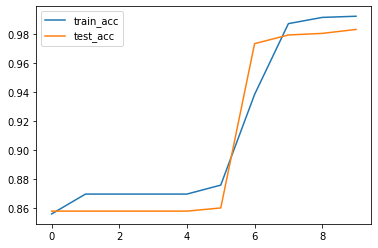

In [19]:
plt.plot(result.history['accuracy'], label='train_acc')
plt.plot(result.history['val_accuracy'], label='test_acc')
plt.legend()

In [36]:
sample = ['Enter to win $25,000 and get a Free Hotel Night! Just click here for a $1 trial membership in NetMarket', 'Dear Samantha, please meet me in my office before you leave.']
sample_sequence = tokenizer.texts_to_sequences(sample)
sample_padded = pad_sequences(sample_sequence, maxlen=T)
sample_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        917,    2,  164, 1325,  564,    8,   31,   

In [37]:
sample_predict = model.predict(sample_padded)

for result in sample_predict:
    print('Spam') if result > 0.5 else print('Not Spam')

Spam
Not Spam
